In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def histogram(img):
    dim = img.shape
    freq = [0.0] * 256
    for i in range(dim[0]):
        for j in range(dim[1]):
            freq[ img[i][j] ] += 1
    freq = np.array(freq)/(dim[0]*dim[1])
    
    cummsum = [0.0] * 256
    for i in range(256):
        cummsum[i] = np.sum(freq[:i+1])
    
    return cummsum

In [6]:
img = cv2.imread("test3.jpeg",cv2.IMREAD_COLOR)
img = np.array(img)
img[:,:,0],img[:,:,2] = np.array(img[:,:,2]), np.array(img[:,:,0])
img = 0.3 * img[:,:,0] + 0.59 * img[:,:,1] + 0.11 * img[:,:,2]
img = img.astype(int)
img.shape

(426, 640)

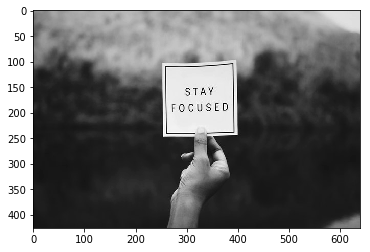

In [7]:
plt.imshow(img, cmap = "gray")

In [8]:
cum1 = histogram(img)
cum1 = np.array([ cum1[i]*256 for i in range(256) ]).astype(int)

# cumu

In [9]:
spe = cv2.imread("prewitt1.jpg",cv2.IMREAD_COLOR)
spe = np.array(spe)
spe[:,:,0],spe[:,:,2] = np.array(spe[:,:,2]), np.array(spe[:,:,0])
spe = 0.3 * spe[:,:,0] + 0.59 * spe[:,:,1] + 0.11 * spe[:,:,2]
spe = spe.astype(int)
spe.shape

(242, 247)

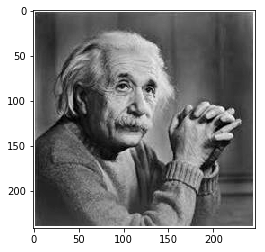

In [10]:
plt.imshow(spe, cmap = "gray")

In [11]:
cum2 = histogram(spe)
cum2 = np.array([ cum2[i]*256 for i in range(256) ]).astype(int)

In [12]:
d=np.zeros(256)
for x in range(256):
    for y in range(256):
        if cum2[y]>=cum1[x]:
            d[x]=y
            break

In [13]:
dim = img.shape
out=np.zeros(dim)
for i in range(dim[0]):
    for j in range(dim[1]):
        out[i,j]=d[img[i,j]]

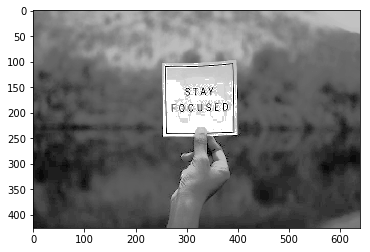

In [14]:
plt.imshow(out, cmap = "gray")

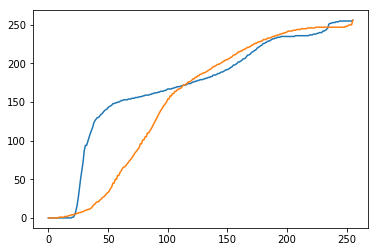

In [15]:
plt.plot(cum1)
plt.plot(cum2)